In [28]:
import pandas as pd

# Load your financial data
df = pd.read_excel('data/Service_Financials_Profitability.xlsx')

# Create a formatted copy for display only
formatted_df = df.copy()

# Columns to format
currency_cols = [
    'Revenue', 'Cost of Service', 'Staff Cost', 'Software Cost',
    'Admin & Rent', 'Total Expense', 'Gross Profit', 'Net Profit'
]

# Apply ₦ and comma formatting
for col in currency_cols:
    formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:,.0f}")

# Format percentage
formatted_df['Net Profit Margin (%)'] = formatted_df['Net Profit Margin (%)'].apply(lambda x: f"{x:.2f}%")

# Preview formatted table
formatted_df.head()


,Month,Department,Revenue,Cost of Service,Staff Cost,Software Cost,Admin & Rent,Total Expense,Gross Profit,Net Profit,Net Profit Margin (%)
0,Jan,Consulting,"85,795","33,683","14,859","6,857","3,243","58,642","52,112","27,153",31.65%
1,Jan,Marketing,"107,194","34,182","14,296","6,125","6,704","61,307","73,012","45,887",42.81%
2,Jan,Customer Support,"134,820","53,319","24,704","8,172","5,270","91,465","81,501","43,355",32.16%
3,Feb,Consulting,"123,707","42,276","12,458","6,327","6,957","68,018","81,431","55,689",45.02%
4,Feb,Marketing,"88,431","25,982","12,082","6,438","6,124","50,626","62,449","37,805",42.75%


In [42]:
summary = df.groupby('Department')[['Revenue', 'Gross Profit', 'Net Profit']].sum()

summary_styled = summary.style.format("{:,.0f}")

summary_styled


,Revenue,Gross Profit,Net Profit
Department,,,
Consulting,"1,280,697","849,576","513,715"
Customer Support,"1,363,322","896,674","495,946"
Marketing,"1,351,083","921,785","580,536"


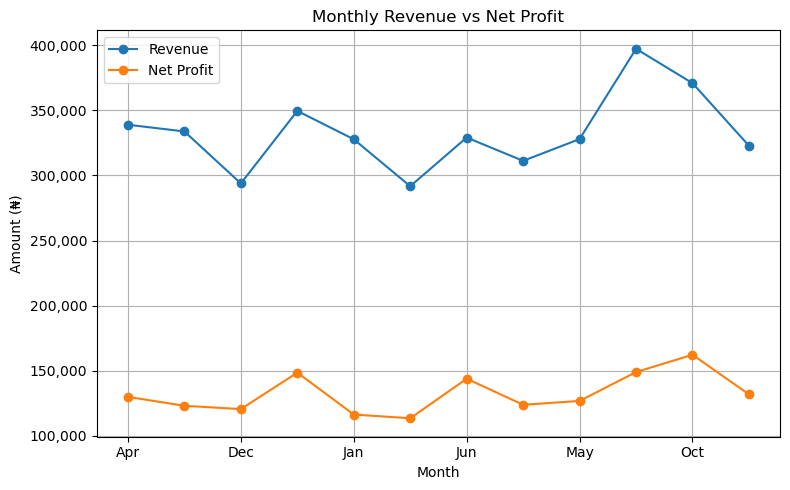

In [48]:
# Monthly Revenue vs Net Profit Trend

import matplotlib.ticker as mtick

monthly = df.groupby('Month')[['Revenue', 'Net Profit']].sum()
ax = monthly.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Monthly Revenue vs Net Profit')
plt.ylabel('Amount (₦)')
plt.grid(True)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.savefig('monthly_revenue_net_profit.png', dpi=300)
plt.show()


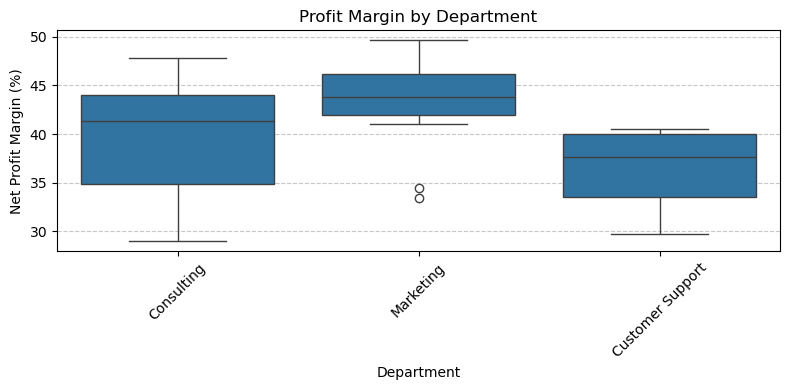

In [49]:
# Profit Margin Distribution by Department

import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x='Department', y='Net Profit Margin (%)', data=df)
plt.title('Profit Margin by Department')
plt.ylabel('Net Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('profit_margin_by_department.png', dpi=300)
plt.show()



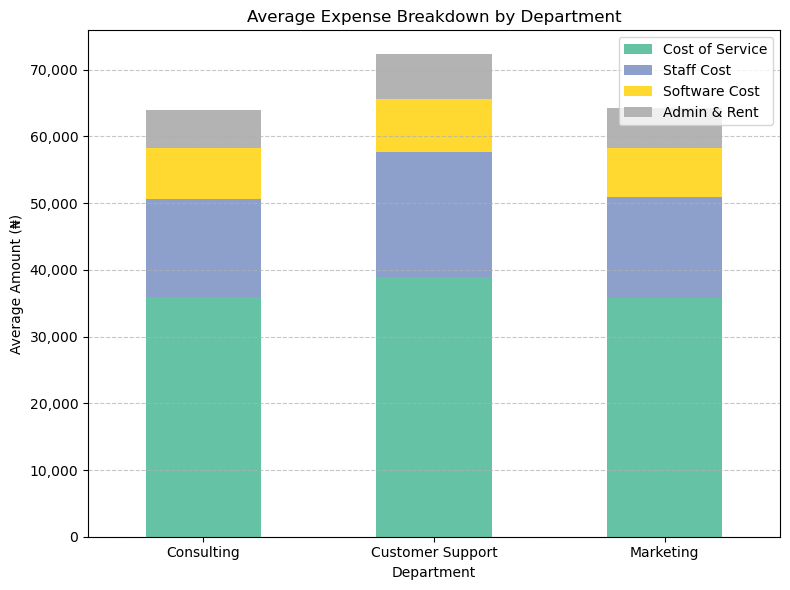

In [51]:
# Average Expense Breakdown by Department

expense_cols = ['Cost of Service', 'Staff Cost', 'Software Cost', 'Admin & Rent']
expense_summary = df.groupby('Department')[expense_cols].mean()
ax = expense_summary.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Set2')

plt.title('Average Expense Breakdown by Department')
plt.ylabel('Average Amount (₦)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.savefig('average_expense_by_department.png', dpi=300)
plt.show()


In [37]:
top_months = df.groupby('Month')['Net Profit'].sum().sort_values(ascending=False).head(3)

# Format with commas and no decimals
top_months_formatted = top_months.map('{:,.0f}'.format)
print(top_months_formatted)



Month
Oct    162,309
Nov    149,059
Feb    148,598
Name: Net Profit, dtype: object
